In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/clean_data/data_v1.csv', index_col = 0)
df.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


In [4]:
mean_state_income = df.groupby('fips')['federal_gross_income_adj'].mean().reset_index()

fig = go.Figure(data = go.Choropleth(
    locations = mean_state_income['fips'],
    z = mean_state_income['federal_gross_income_adj'],
    locationmode='USA-states',
    colorscale = 'Oranges',
    colorbar_title = "Mean Income"
))
fig.update_layout(
    geo_scope = 'usa',
    title_text = "2023 Income by State"
)
#fig.write_image('../site_pages/plots/mean_income_by_state.png')


C:\Users\admin\AppData\Local\Temp\ipykernel_29748\1496353851.py:11: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



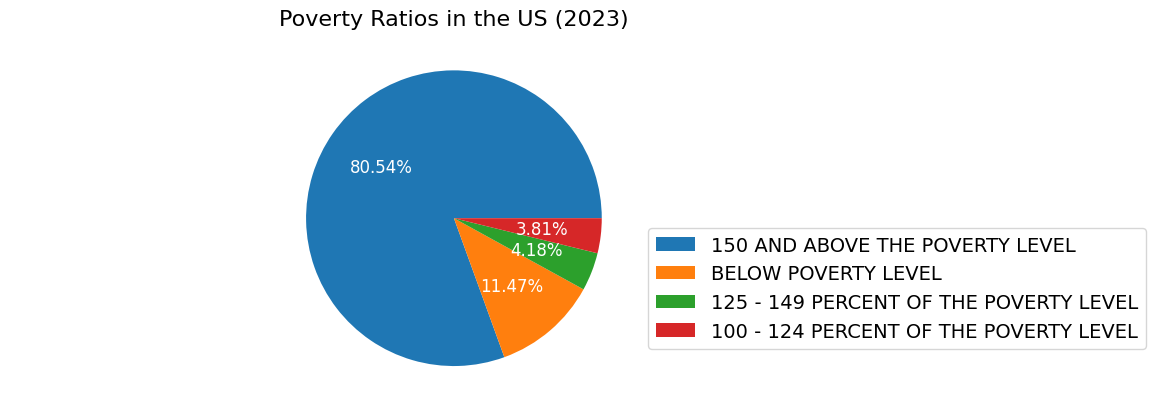

In [5]:
impoverished = df.loc[df['poverty_ratio'] != "NOT IN POVERTY UNIVERSE"]
plt.pie(impoverished['poverty_ratio'].value_counts(),
    labels = impoverished['poverty_ratio'].value_counts().index,
    autopct = '%.2f%%',
    textprops = {'color':'w','fontsize':12})
plt.legend(bbox_to_anchor=(1,0.5),
    loc="best",
    fontsize=14)
plt.title('Poverty Ratios in the US (2023)',
    fontsize = 16)
plt.tight_layout()
plt.savefig('../site_pages/plots/poverty_ratios.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



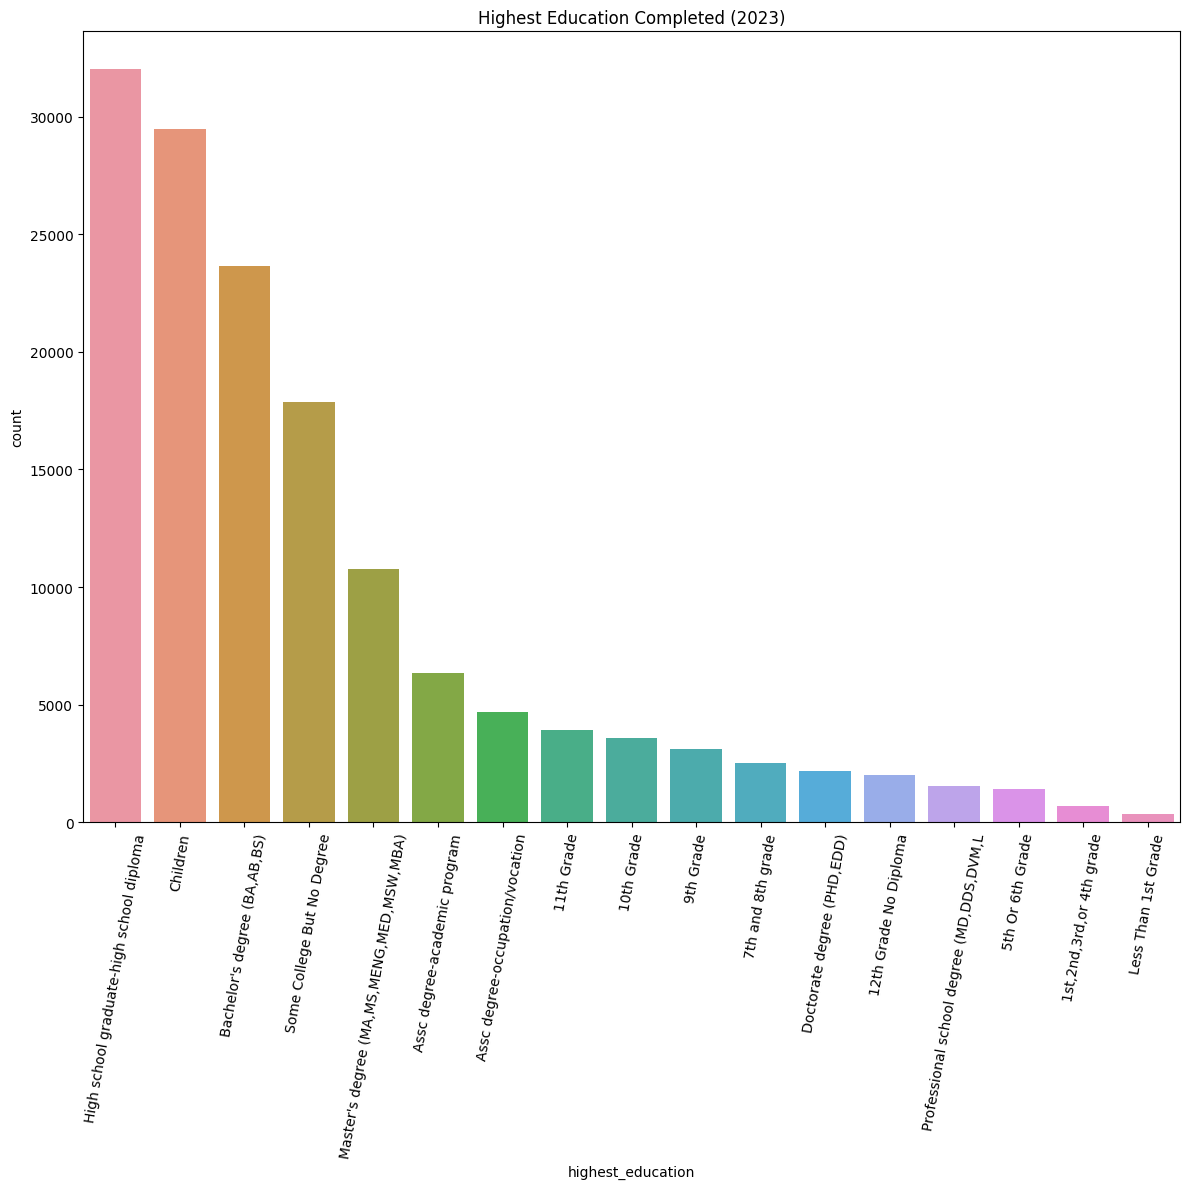

In [6]:
plt.figure(figsize = (12,12))
sns.countplot(data = df, 
                x = "highest_education",
                order = df['highest_education'].value_counts().index)
plt.xticks(rotation = 80)
plt.title("Highest Education Completed (2023)")
plt.tight_layout()
plt.savefig('../site_pages/plots/education.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



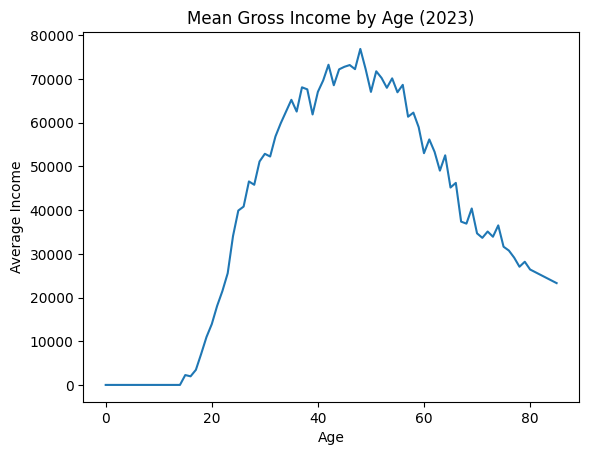

In [50]:
income_by_age = df.groupby('age')['federal_gross_income_adj'].mean().reset_index()
sns.lineplot(
    data = income_by_age,
    x = 'age',
    y = 'federal_gross_income_adj'
)
plt.title("Mean Gross Income by Age (2023)")
plt.ylabel("Average Income")
plt.xlabel("Age")
plt.savefig('../site_pages/plots/income_by_age.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



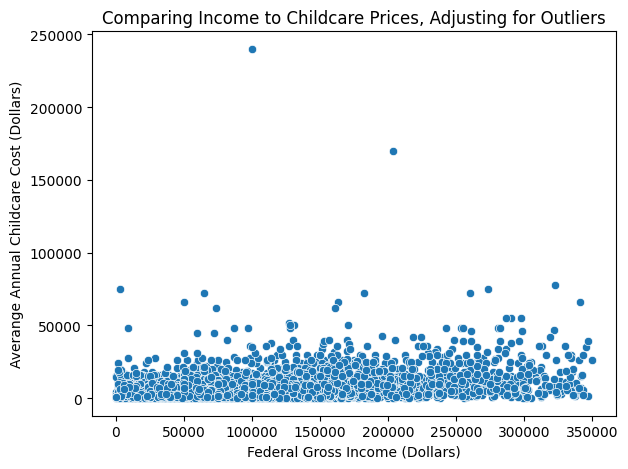

In [61]:
pays_rent = df.copy()
pays_rent = pays_rent.loc[pays_rent['hh_childcare_val'] > 0]
pays_rent = pays_rent.loc[pays_rent['federal_gross_income_adj'] > 0]

q1_inc = pays_rent.federal_gross_income_adj.quantile(0.25)
q3_inc = pays_rent.federal_gross_income_adj.quantile(0.75)
IQR_inc = q3_inc - q1_inc
low_inc = q1_inc - (1.5*IQR_inc)
high_inc = q3_inc + (1.5*IQR_inc)
pays_rent.federal_gross_income_adj = pays_rent.federal_gross_income_adj[(pays_rent.federal_gross_income_adj > low_inc) & (pays_rent.federal_gross_income_adj < high_inc)]

''''
q1_rent = pays_rent.fam_rent_val.quantile(0.25)
q3_rent = pays_rent.fam_rent_val.quantile(0.75)
IQR_rent = q3_rent - q1_rent
low_rent = q1_rent - (1.5*IQR_rent)
high_rent = q3_rent + (1.5*IQR_rent)
pays_rent.fam_rent_val = pays_rent.fam_rent_val[(pays_rent.fam_rent_val > low_rent) & (pays_rent.fam_rent_val < high_rent)]
'''

sns.scatterplot(
    data = pays_rent,
    x = 'federal_gross_income_adj',
    y = 'hh_childcare_val',
)
plt.title("Comparing Income to Childcare Prices, Adjusting for Outliers")
plt.tight_layout()
plt.xlabel("Federal Gross Income (Dollars)")
plt.ylabel("Averange Annual Childcare Cost (Dollars)")
plt.savefig('../site_pages/plots/chilcare_costs.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



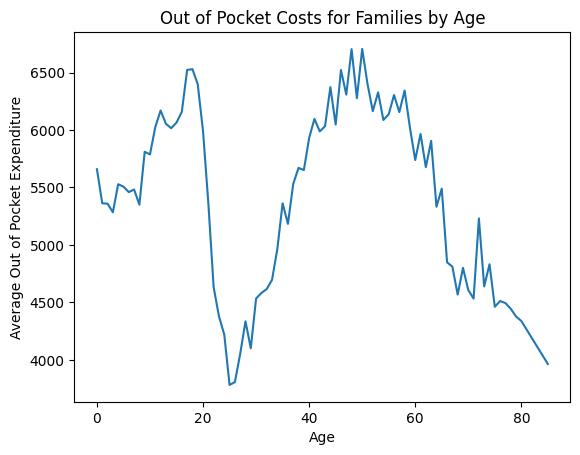

In [68]:
health_income = df.loc[df['fam_outofpocket_med_costs']>0]
health_income = health_income.groupby('age')['fam_outofpocket_med_costs'].mean().reset_index()
sns.lineplot(
    data = health_income,
    x = 'age',
    y = 'fam_outofpocket_med_costs'
)
plt.title("Out of Pocket Costs for Families by Age")
plt.ylabel("Average Out of Pocket Expenditure")
plt.xlabel("Age")
plt.savefig('../site_pages/plots/health_by_age.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Py

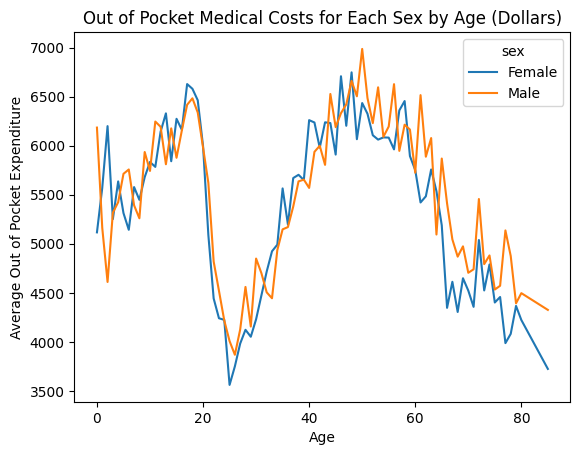

In [69]:
health_income = df.loc[df['fam_outofpocket_med_costs']>0]
health_income = health_income.groupby(['age', 'sex'])['fam_outofpocket_med_costs'].mean().reset_index()
sns.lineplot(
    data = health_income,
    x = 'age',
    y = 'fam_outofpocket_med_costs',
    hue = 'sex'
)
plt.title("Out of Pocket Medical Costs for Each Sex by Age (Dollars)")
plt.ylabel("Average Out of Pocket Expenditure")
plt.xlabel("Age")
plt.savefig('../site_pages/plots/health_by_age_sex.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Py

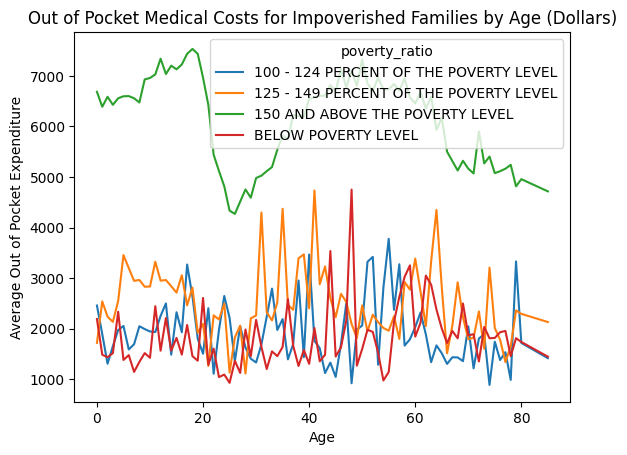

In [121]:
health_income = df.loc[df['fam_outofpocket_med_costs']>0]
health_income = health_income.loc[health_income['poverty_ratio'] != "NOT IN POVERTY UNIVERSE"]
health_income = health_income.groupby(['age', 'poverty_ratio'])['fam_outofpocket_med_costs'].mean().reset_index()
sns.lineplot(
    data = health_income,
    x = 'age',
    y = 'fam_outofpocket_med_costs',
    hue = 'poverty_ratio'
)
plt.title("Out of Pocket Medical Costs for Impoverished Families by Age (Dollars)")
plt.ylabel("Average Out of Pocket Expenditure")
plt.xlabel("Age")
plt.savefig('../site_pages/plots/health_by_poverty.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



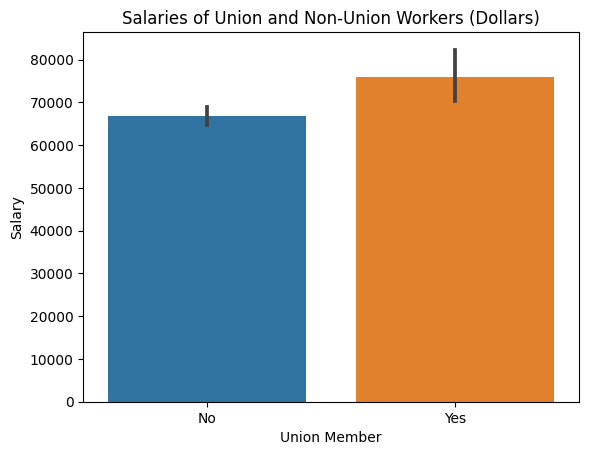

In [120]:
union = df.loc[df['union_member_yn'] != "Not in universe or children & Armed Forc"]
sns.barplot(
    data = union,
    y = 'federal_gross_income_adj',
    x = 'union_member_yn'
)
plt.savefig('../site_pages/plots/union_member.png')
plt.title("Salaries of Union and Non-Union Workers (Dollars)")
plt.ylabel("Salary")
plt.xlabel("Union Member")
plt.savefig('../site_pages/plots/union_member.png')

In [78]:
df.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



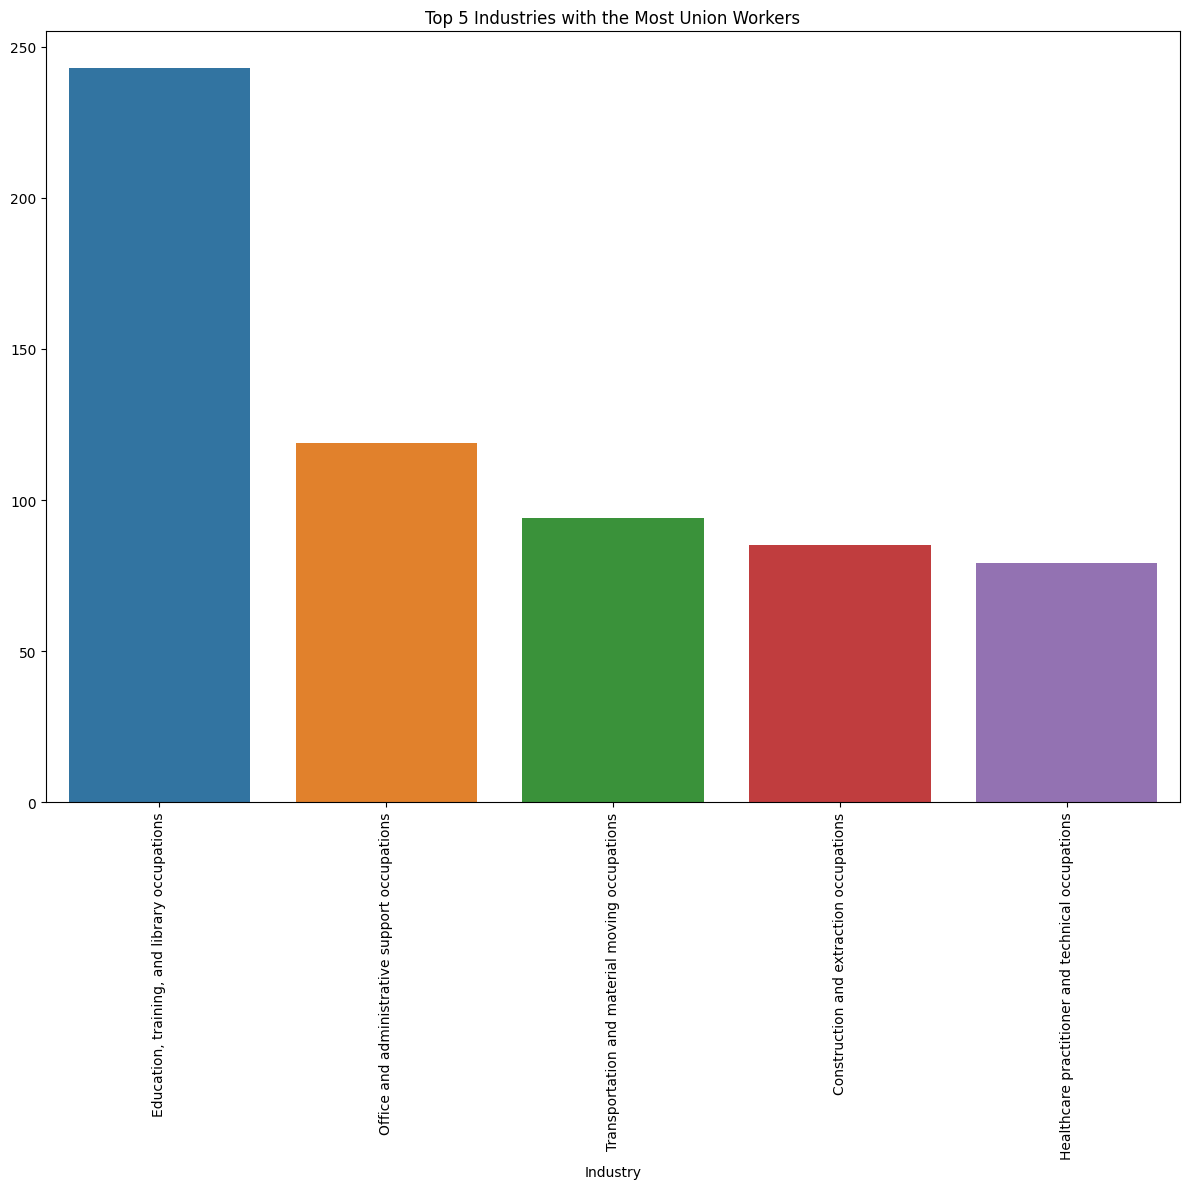

In [119]:
union_industry = df.loc[df['union_member_yn'] == "Yes"]
industry_participation = union_industry['job_industry_recode'].value_counts().nlargest(5)

plt.figure(figsize = (12,12))
sns.countplot(
    data = union_industry,
    x = 'job_industry_recode',
    order = industry_participation.index
)
plt.xlabel("Industry")
plt.ylabel('')
plt.xticks(rotation = 90)
plt.title('Top 5 Industries with the Most Union Workers')
plt.tight_layout()
plt.savefig('../site_pages/plots/industry_union.png')



In [113]:
industry_participation

job_industry_recode
Education, training, and library occupations         243
Office and administrative support occupations        119
Transportation and material moving occupations        94
Construction and extraction occupations               85
Healthcare practitioner and technical occupations     79
Name: count, dtype: int64